In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
import sys
from Generate_Data import Generate
from Lasso_Linear import Lasso_Linear
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [2]:
funcs = [
    lambda x: np.power(x, 1),
    lambda x: np.power(x, 2),
    lambda x: np.power(x, 3),
    lambda x: np.power(x, 4),
    lambda x: np.power(x, 5)
]
difffunc = lambda X,t,lamb,w: -2.0*(X.T).dot(t) + 2.0*(X.T).dot(X).dot(w) + lamb*np.sign(w)

func = lambda X,t,lamb,w: ((t - X.dot(w)).T).dot(t - X.dot(w)) + lamb*np.sum(np.absolute(w))

sigma = 0.1
Nsample = 50
lamda = 0
eta = 0.000000002
eps = 0.000000001
steps = 5000000
flimit = 5

In [3]:
gr = Generate(Nsample, sigma, funcs)

xTrain, yTrain = gr.train_data()
xTrain_features = gr.extract_features(xTrain)

ls = Lasso_Linear(xTrain_features, yTrain, lamda, eta, eps, flimit, steps, func, difffunc)
ls.fit()

init w: [[ 1.0246127 ]
 [ 4.59645778]
 [ 6.44398377]
 [ 7.87994343]
 [ 6.2270842 ]
 [-7.43922589]]
-----------
w = 
[[1.02636414]
 [4.60583174]
 [6.49504642]
 [8.16202122]
 [7.80292228]
 [1.44505578]]
f(w) = [[3.63940589e+09]]
at step: 0
-----------
w = 
[[ 0.79990729]
 [ 4.00127325]
 [ 4.79209314]
 [ 3.5394042 ]
 [-2.23148606]
 [ 0.25138531]]
f(w) = [[23800.96849515]]
at step: 50000
-----------
w = 
[[ 0.69387904]
 [ 3.7981747 ]
 [ 4.43328956]
 [ 3.11608939]
 [-2.00330193]
 [ 0.22665027]]
f(w) = [[19666.77438956]]
at step: 100000
-----------
w = 
[[ 0.59737168]
 [ 3.61344062]
 [ 4.10710286]
 [ 2.73141929]
 [-1.79592261]
 [ 0.20416967]]
f(w) = [[16250.97956286]]
at step: 150000
-----------
w = 
[[ 0.50951903]
 [ 3.44539972]
 [ 3.81056406]
 [ 2.38187574]
 [-1.60745415]
 [ 0.18373827]]
f(w) = [[13428.74597574]]
at step: 200000
-----------
w = 
[[ 0.42953377]
 [ 3.29253284]
 [ 3.54097445]
 [ 2.06426082]
 [-1.43617499]
 [ 0.16516953]]
f(w) = [[11096.92901918]]
at step: 250000
-----------
w

-----------
w = 
[[-0.41502557]
 [ 1.72867795]
 [ 0.85326892]
 [-1.03531897]
 [ 0.24607359]
 [-0.01753268]]
f(w) = [[8.47968435]]
at step: 2750000
-----------
w = 
[[-0.41684715]
 [ 1.72633498]
 [ 0.85076096]
 [-1.03671514]
 [ 0.24707635]
 [-0.01764896]]
f(w) = [[8.29892141]]
at step: 2800000
-----------
w = 
[[-0.41860903]
 [ 1.72410194]
 [ 0.8484426 ]
 [-1.03789147]
 [ 0.24795997]
 [-0.01775231]]
f(w) = [[8.14242775]]
at step: 2850000
-----------
w = 
[[-0.42031623]
 [ 1.72196915]
 [ 0.84629667]
 [-1.03886826]
 [ 0.24873538]
 [-0.01784391]]
f(w) = [[8.00603528]]
at step: 2900000
-----------
w = 
[[-0.42197331]
 [ 1.71992782]
 [ 0.84430758]
 [-1.03966399]
 [ 0.24941253]
 [-0.01792483]]
f(w) = [[7.88629985]]
at step: 2950000
-----------
w = 
[[-0.42358443]
 [ 1.71796997]
 [ 0.84246116]
 [-1.04029542]
 [ 0.25000044]
 [-0.01799606]]
f(w) = [[7.78037546]]
at step: 3000000
-----------
w = 
[[-0.42515335]
 [ 1.71608834]
 [ 0.84074452]
 [-1.04077781]
 [ 0.25050735]
 [-0.0180585 ]]
f(w) = [[7

In [4]:
xPre, yPre = gr.predict_data()
xPre_features = gr.extract_features(xPre)

yPre_out,mse = ls.predict(xPre_features, yPre)
print("MSE: ", mse)

#using scikitlearn
model_lasso = Lasso(alpha=eta).fit(xTrain, yTrain)
y_pred = model_lasso.predict(xPre)
mse_scikit = mean_squared_error(yPre, y_pred)
print("MSE of scikit_learn:",mse_scikit)

MSE:  0.15110948289931098
MSE of scikit_learn: 0.2321518745386943


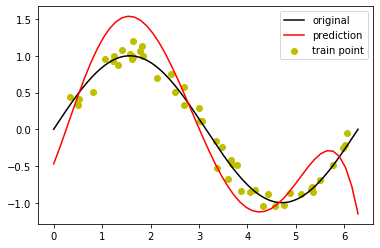

In [6]:
ori = np.linspace(0, 2*np.pi, 200)
plt.plot(ori,np.sin(ori),c ='k',label = "original")
plt.scatter(xTrain, yTrain, c = 'y',label = "train point")
plt.plot(xPre.ravel(),yPre_out.ravel(),c = 'r',label = "prediction")
#plt.ylim(-4, 4)
plt.legend()
plt.show()